In [1]:
import sys
dirname = '/Users/muhammaddaffarobani/Documents/personal_research/smt'
if dirname not in sys.path:
    sys.path.append(dirname)

import pandas as pd
import numpy as np
from smt.surrogate_models import KRG
from smt.problems import WingWeight
from smt.sampling_methods import LHS
from sklearn.metrics import mean_squared_error


from smt.explainability_tools import ShapFeatureImportanceDisplay, ShapDisplay
import matplotlib.pyplot as plt



In [2]:
ndoe = 625 
fun = WingWeight()
sampling = LHS(xlimits=fun.xlimits, criterion='ese', random_state=1)
X = sampling(ndoe)
y = fun(X)

n_train = int(0.8*ndoe)

X_tr, y_tr = X[:n_train, :], y[:n_train]
X_te, y_te = X[n_train:, :], y[n_train:]

In [3]:
kriging_model = KRG(
    theta0=[1e-2]*X_tr.shape[1],
    print_prediction = False
    )
kriging_model.set_training_values(
    X_tr, 
    y_tr
    )

kriging_model.train()
y_pred = kriging_model.predict_values(X_te)
rmse = mean_squared_error(y_te, y_pred, squared=False)
print(f"RMSE: {rmse:.4f}")


___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 500
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec): 14.5305371
RMSE: 0.0470


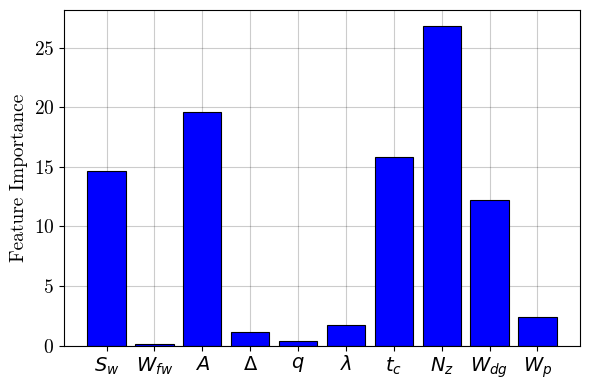

In [4]:
model = kriging_model
feature_names = [
    r'$S_{w}$', 
    r'$W_{fw}$', 
    r'$A$', 
    r'$\Delta$', 
    r'$q$', 
    r'$\lambda$', 
    r'$t_{c}$',
    r'$N_{z}$', 
    r'$W_{dg}$', 
    r'$W_{p}$',
]

feature_importance = ShapFeatureImportanceDisplay.from_surrogate_model(
    model, 
    X_tr, 
    feature_names=feature_names,
)

In [5]:
feature_importance.feature_importance

array([14.6580879 ,  0.122639  , 19.63069497,  1.17860836,  0.40433294,
        1.74520705, 15.79558432, 26.80892993, 12.2478774 ,  2.40520874])

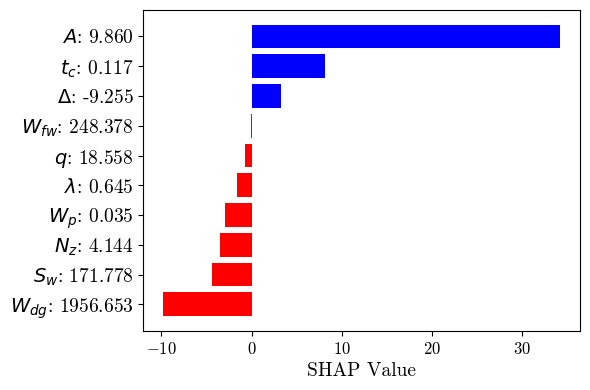

In [6]:
instance = X_te[0].reshape(1, -1)
model = kriging_model
feature_names = [
    r'$S_{w}$', 
    r'$W_{fw}$', 
    r'$A$', 
    r'$\Delta$', 
    r'$q$', 
    r'$\lambda$', 
    r'$t_{c}$',
    r'$N_{z}$', 
    r'$W_{dg}$', 
    r'$W_{p}$',
]
filename = "example_results/shap/blabla.png"

display = ShapDisplay.from_surrogate_model(
    instance, 
    model, 
    X_tr, 
    feature_names=feature_names,
)
display.individual_plot(filename=filename)

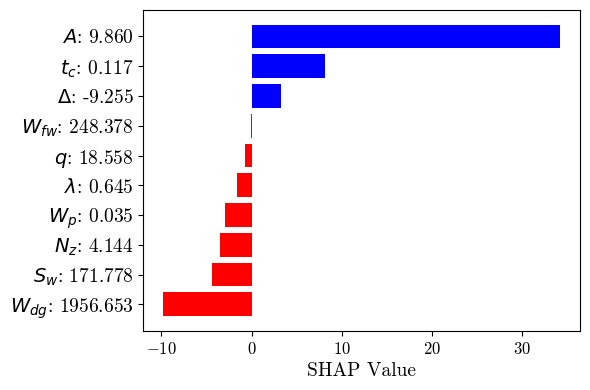

In [7]:
instances = X_te
model = kriging_model
feature_names = [
    r'$S_{w}$', 
    r'$W_{fw}$', 
    r'$A$', 
    r'$\Delta$', 
    r'$q$', 
    r'$\lambda$', 
    r'$t_{c}$',
    r'$N_{z}$', 
    r'$W_{dg}$', 
    r'$W_{p}$',
]
filename = "example_results/shap/blabla.png"

display = ShapDisplay.from_surrogate_model(
    instances, 
    model, 
    X_tr, 
    feature_names=feature_names,
)
display.individual_plot(
    index=0,
    filename=filename
)

In [8]:
instances = X_tr
model = kriging_model
feature_names = [
    r'$S_{w}$', 
    r'$W_{fw}$', 
    r'$A$', 
    r'$\Delta$', 
    r'$q$', 
    r'$\lambda$', 
    r'$t_{c}$',
    r'$N_{z}$', 
    r'$W_{dg}$', 
    r'$W_{p}$',
]
display = ShapDisplay.from_surrogate_model(
    instances, 
    model, 
    X_tr, 
    feature_names=feature_names,
)

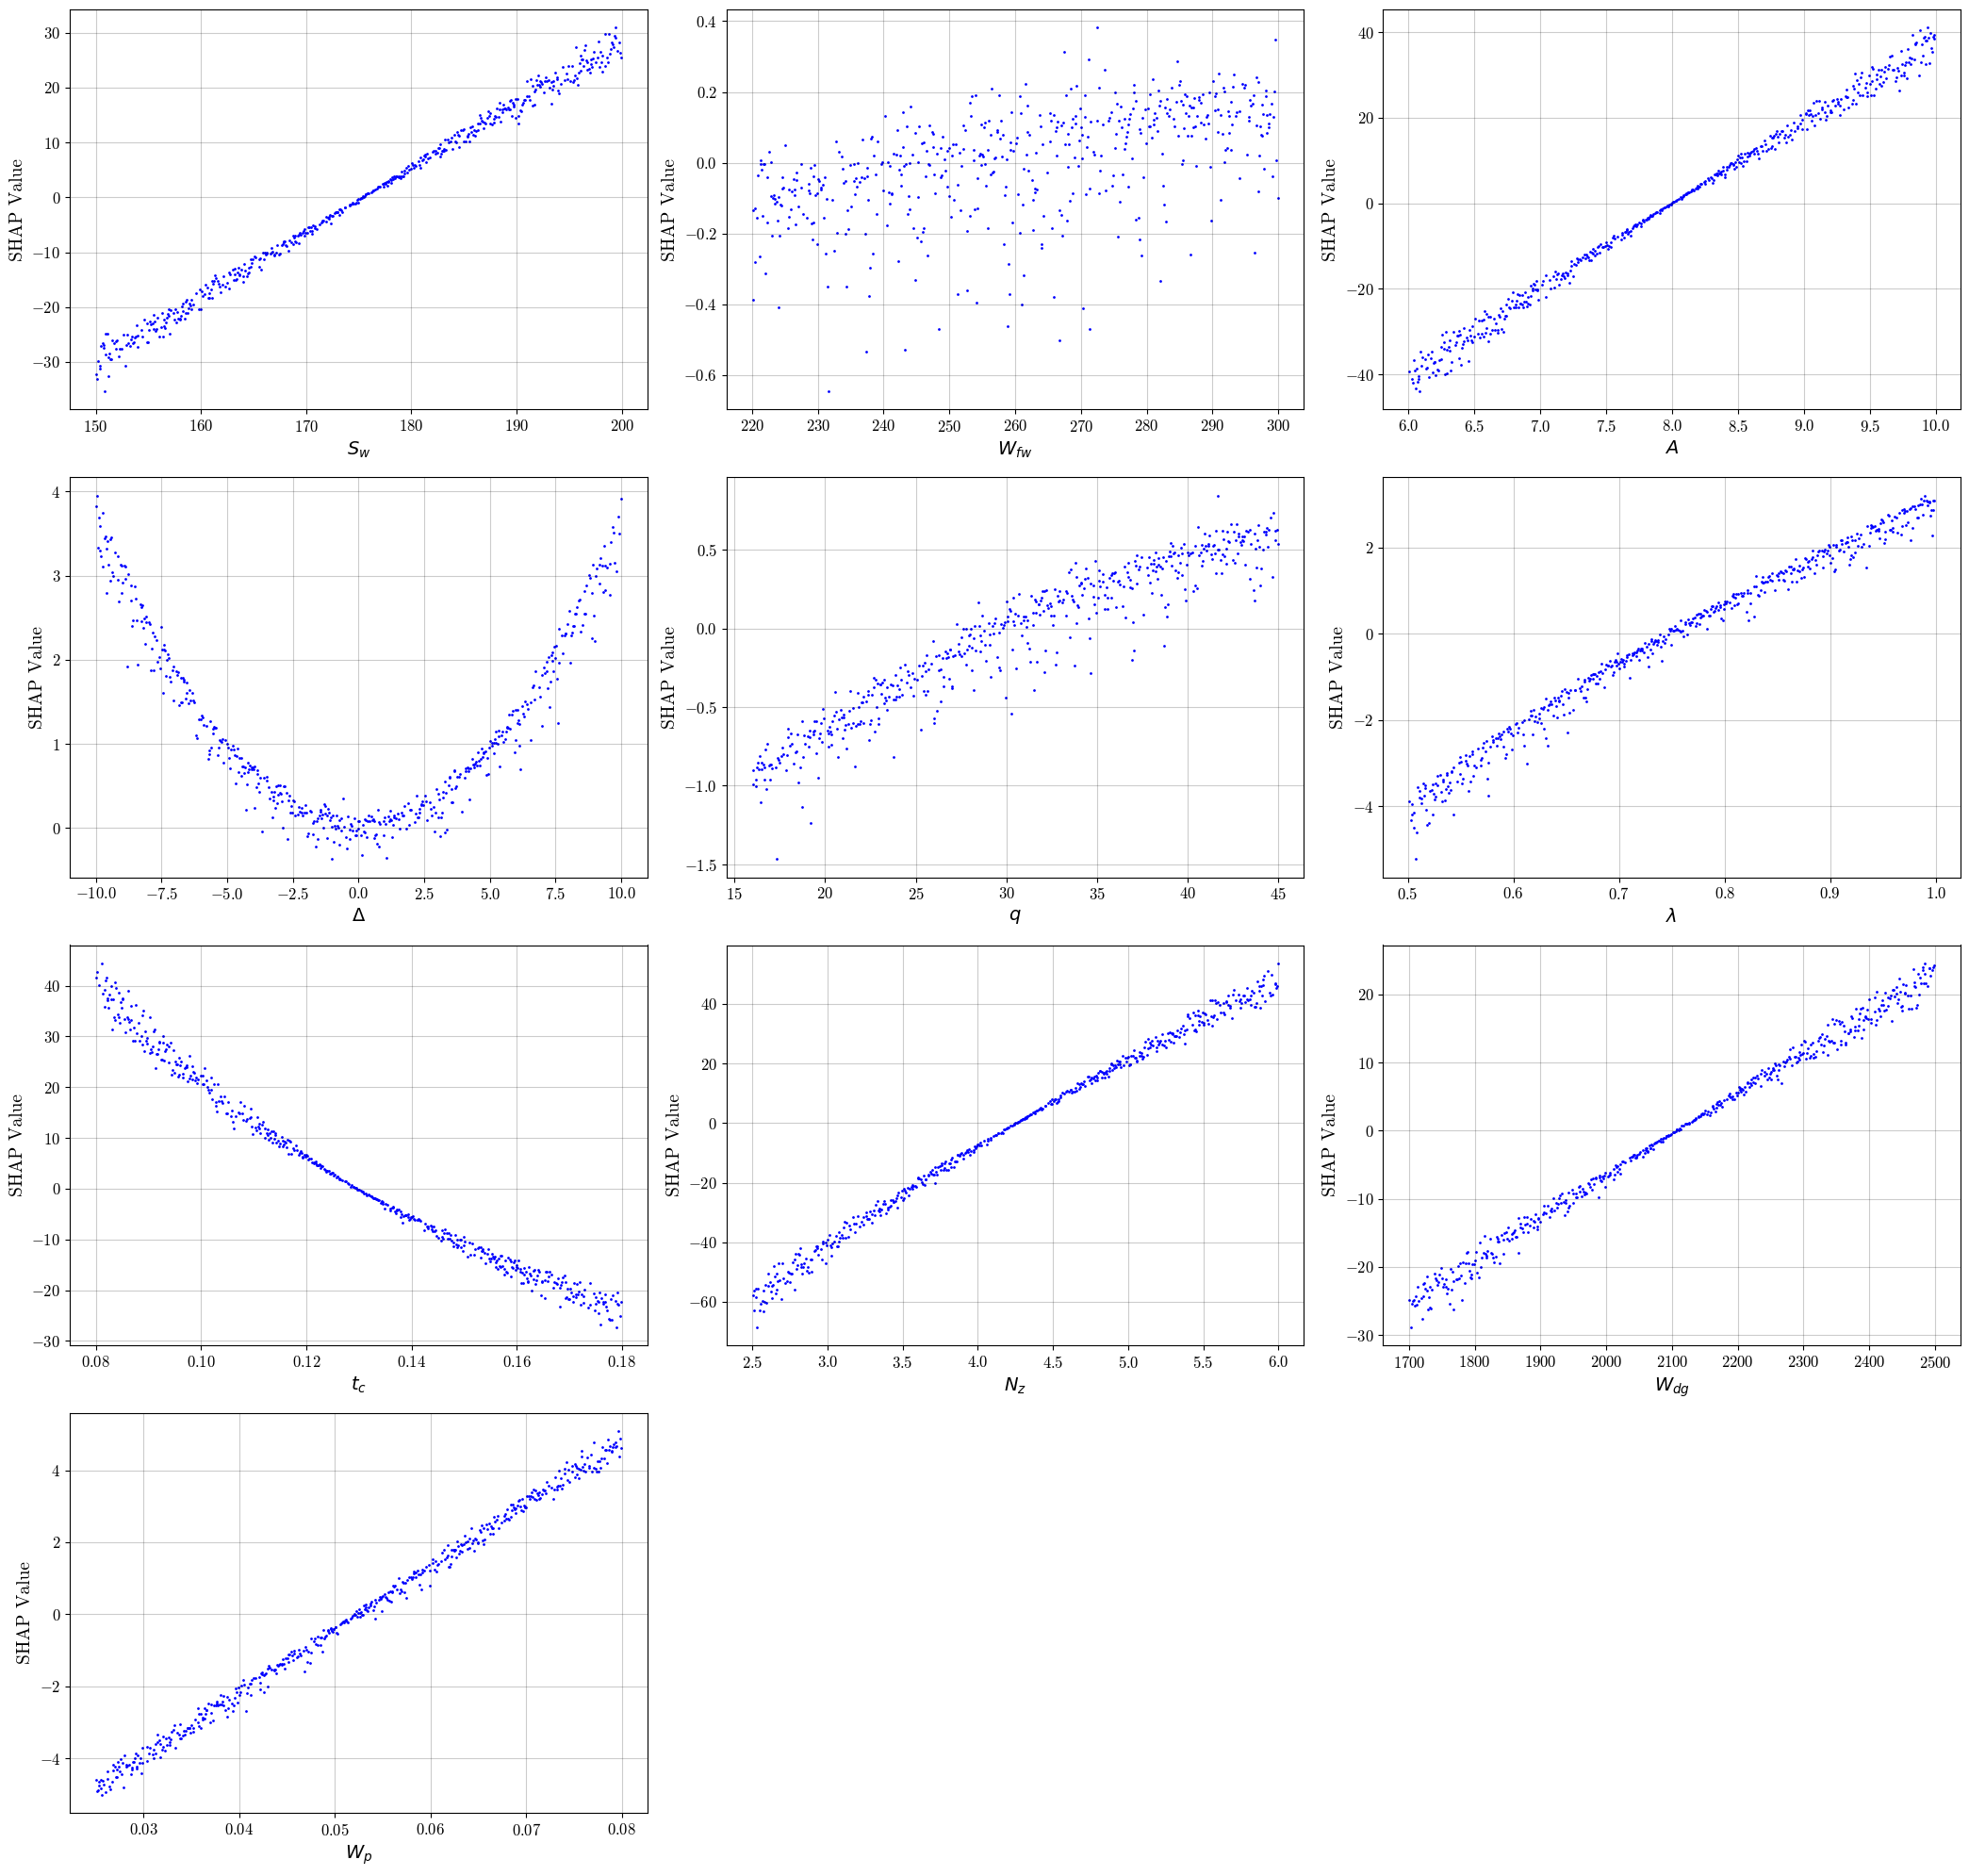

In [9]:
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

display.dependence_plot(
    features
)

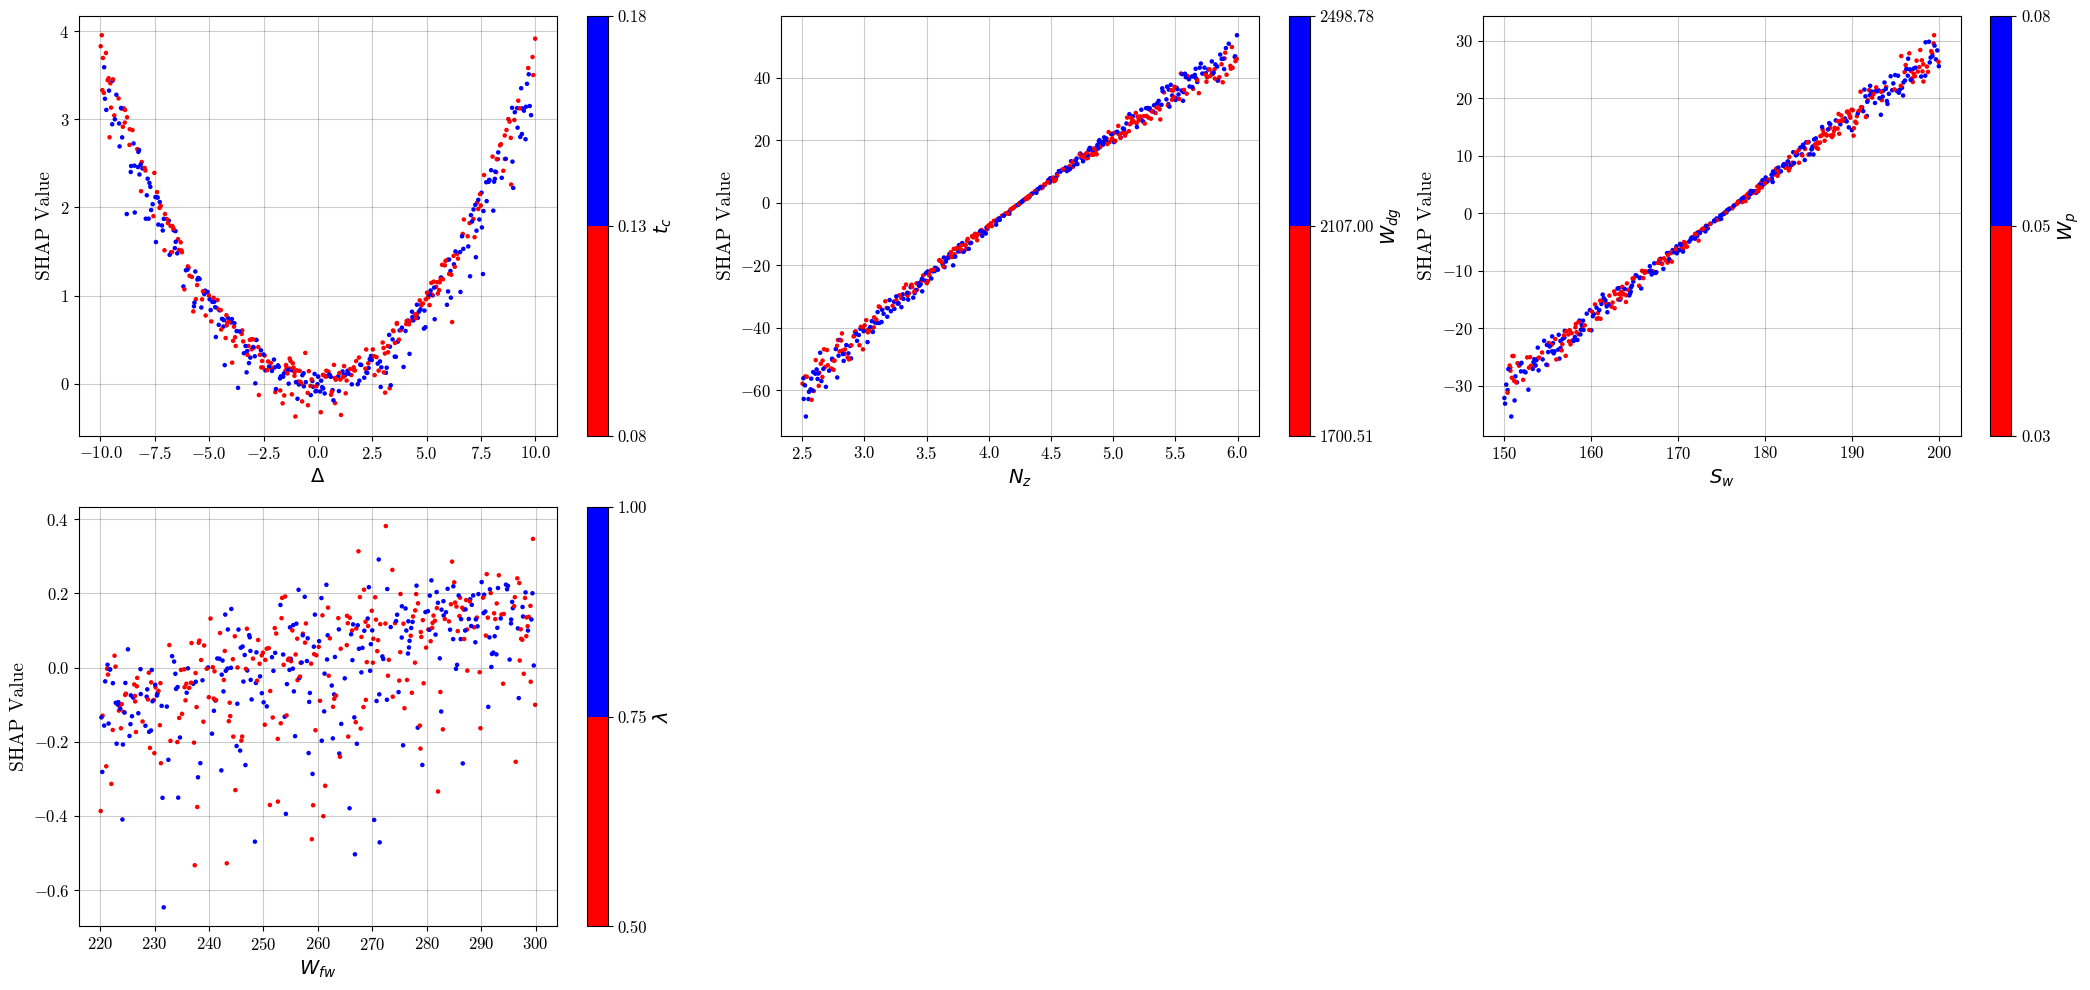

In [10]:
features = [(3, 6), (7, 8), (0, 9), (1, 5)] 

display.dependence_plot(
    features
)

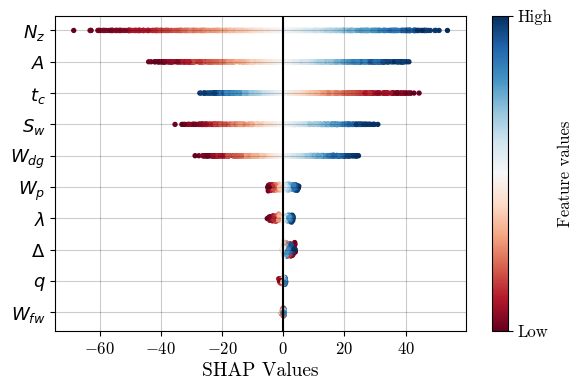

In [14]:
display.summary_plot(figsize=(6, 4))